In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import soundfile as sf
import numpy as np
import librosa as lr
from librosa import display

In [2]:
audio, sample_rate = lr.load('../raw_data/sample_audio/Alburger, Mark, The Twelve Fingers, Op.8, ZUmCV1zUuBw.wav')

time = np.arange(0, len(audio)) / sample_rate

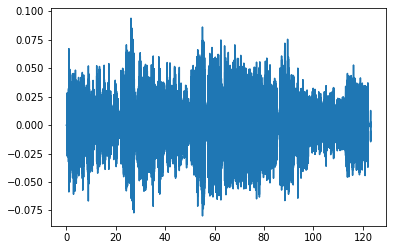

In [4]:
plt.plot(time, audio);

In [5]:
audio_transformed = np.abs(lr.stft(audio))
D = lr.stft(audio)
audio_transformed
D

array([[-1.3237500e-02+0.00000000e+00j, -2.6852725e-02+0.00000000e+00j,
        -3.1189540e-02+0.00000000e+00j, ...,
         3.5094839e-02+0.00000000e+00j,  4.1368034e-02+0.00000000e+00j,
        -2.4932821e-01+0.00000000e+00j],
       [ 5.5407220e-03-9.30204336e-03j,  1.6242234e-02-3.96106858e-03j,
         1.5680259e-02-2.36351771e-05j, ...,
        -8.5610161e-03+4.28684950e-02j, -1.0360374e-01-2.02877969e-02j,
         1.7611524e-01-2.70625681e-01j],
       [ 1.9443705e-03+5.43113286e-03j, -2.8948304e-03-8.24670482e-04j,
         4.0706596e-05-4.26917468e-05j, ...,
        -1.8525850e-02-2.40227152e-02j,  1.9337786e-02-4.14190851e-02j,
         4.3595888e-02+3.33392441e-01j],
       ...,
       [-1.5060114e-06+1.84670611e-07j,  7.0784120e-07-9.15065570e-08j,
        -7.1007128e-10+3.93850536e-10j, ...,
        -7.9880941e-08+1.08708676e-07j,  7.0177128e-07-9.10775043e-07j,
        -4.0380628e-06+7.36166021e-06j],
       [ 1.5071760e-06-9.28849104e-08j, -4.6479869e-08-7.07410095e-0

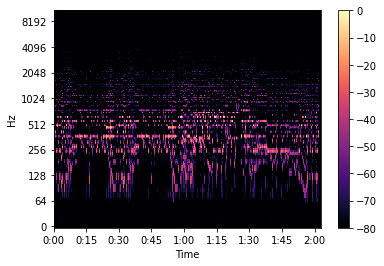

In [13]:
log_power = lr.amplitude_to_db(D**2, ref = np.max)

lr.display.specshow(log_power, x_axis = 'time', y_axis='log')
plt.colorbar()

In [25]:
C = lr.cqt(audio)

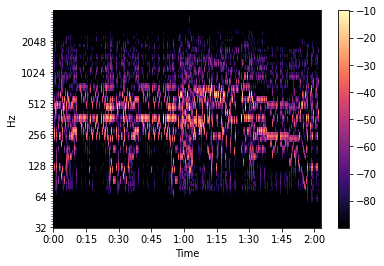

In [26]:
log_power = lr.amplitude_to_db(C**2)

lr.display.specshow(log_power, x_axis = 'time', y_axis='cqt_hz')
plt.colorbar()


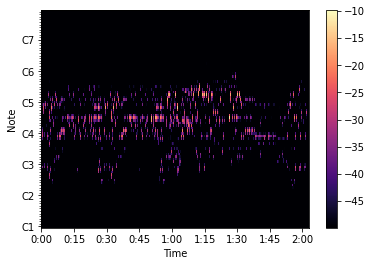

In [27]:
log_power = lr.amplitude_to_db(C**2, top_db = 40)

lr.display.specshow(log_power, x_axis = 'time', y_axis='cqt_note')
plt.colorbar()


In [31]:
new_audio = lr.icqt(C)

In [32]:
print(len(audio), len(new_audio), sample_rate)

2714912 2714624 22050


In [33]:
sf.write('processed-output3.wav', new_audio, sample_rate)

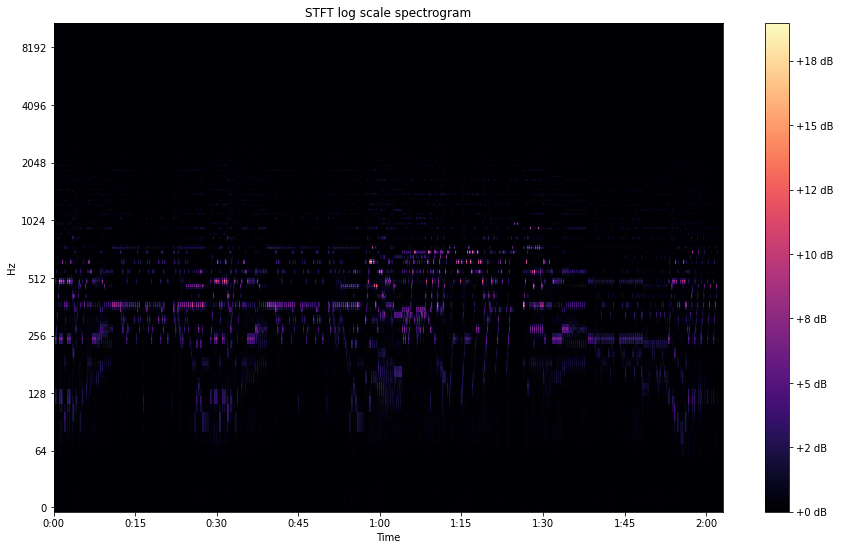

In [40]:
S = lr.stft(audio)
fig, ax = plt.subplots(figsize=(15,9))
img = lr.display.specshow(S, x_axis='time',
                         y_axis='log', sr=sample_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='STFT log scale spectrogram')
plt.savefig('stft-librosa-log.png')

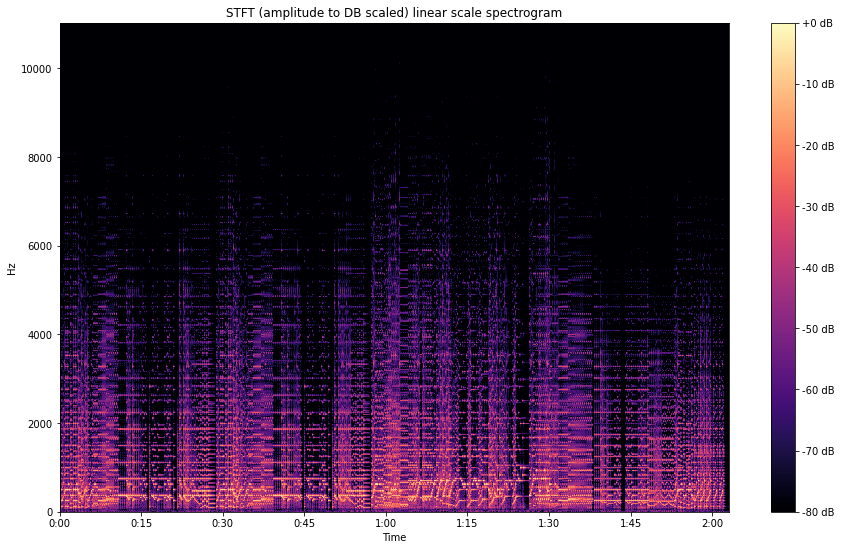

In [41]:
S_dB = lr.amplitude_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(15,9))
img = lr.display.specshow(S_dB, x_axis='time',
                         y_axis='linear', sr=sample_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='STFT (amplitude to DB scaled) linear scale spectrogram')
plt.savefig('stft-librosa-linear-db.png')

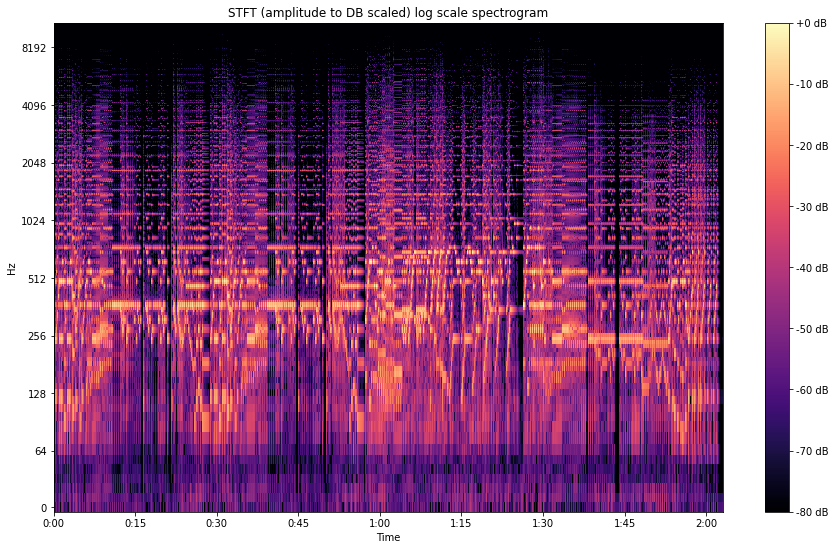

In [42]:
S_dB = lr.amplitude_to_db(S, ref=np.max)
fig, ax = plt.subplots(figsize=(15,9))
img = lr.display.specshow(S_dB, x_axis='time',
                         y_axis='log', sr=sample_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='STFT (amplitude to DB scaled) log scale spectrogram')
plt.savefig('stft-librosa-log-db.png')

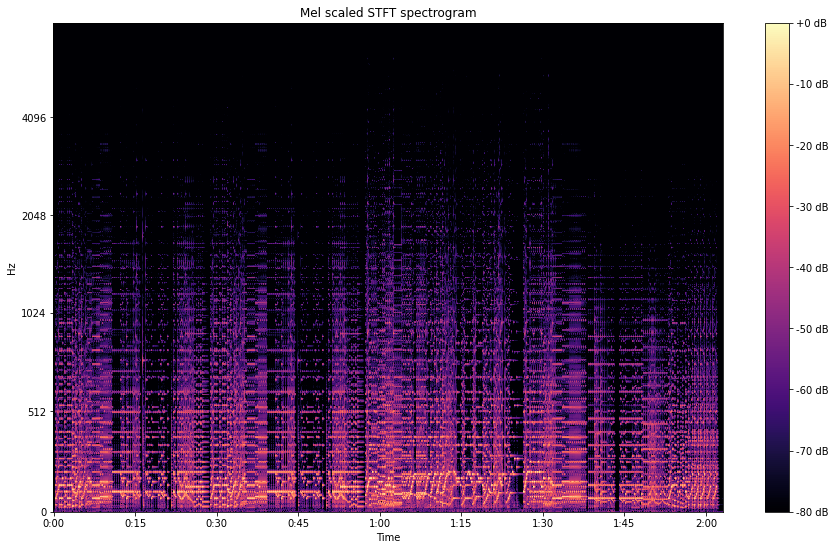

In [43]:
fig, ax = plt.subplots(figsize=(15,9))
img = lr.display.specshow(S_dB, x_axis='time',
                         y_axis='mel', sr=sample_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel scaled STFT spectrogram')
plt.savefig('stft-librosa-mel.png')

In [45]:
n_fft = 2048 # number of FFT components
mel_basis = lr.filters.mel(sample_rate, n_fft)

/var/folders/4j/qgq5s9cs2yb92gw34b25z1mh0000gn/T/ipykernel_65764/1106302738.py:2: FutureWarning: Pass sr=22050, n_fft=2048 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_basis = lr.filters.mel(sample_rate, n_fft)


In [46]:
mel_spectrogram = lr.core.power_to_db(mel_basis.dot(S**2))


/Users/chrishussein/.pyenv/versions/3.8.12/envs/deepOstinato/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  return f(*args, **kwargs)


In [48]:
mel_spectrogram = lr.power_to_db(lr.feature.melspectrogram(audio, sr=sample_rate))


/var/folders/4j/qgq5s9cs2yb92gw34b25z1mh0000gn/T/ipykernel_65764/932707029.py:1: FutureWarning: Pass y=[-2.2254766e-05 -2.5567924e-05 -2.1185357e-05 ... -4.4733258e-03
 -3.2365641e-03 -1.3232187e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spectrogram = lr.power_to_db(lr.feature.melspectrogram(audio, sr=sample_rate))


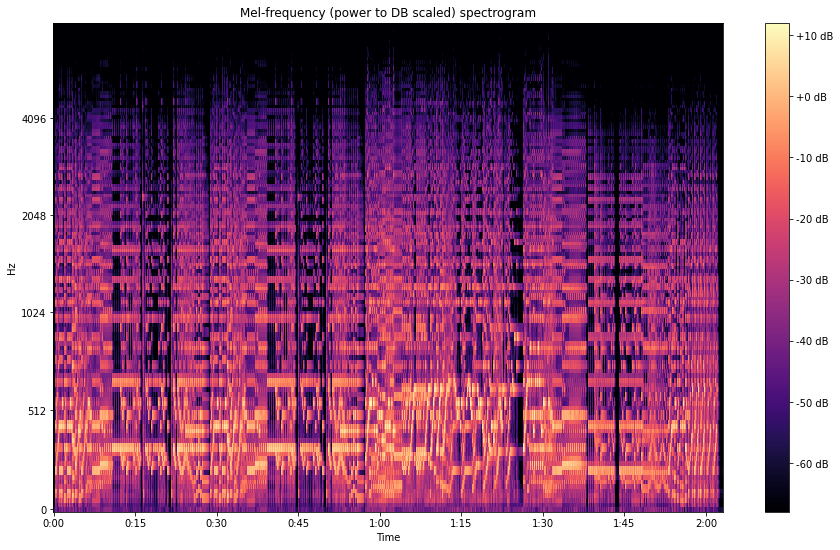

In [50]:
fig, ax = plt.subplots(figsize=(15,9))
img = lr.display.specshow(mel_spectrogram, x_axis='time',
                         y_axis='mel', sr=sample_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='Mel-frequency (power to DB scaled) spectrogram')
plt.savefig('mel-spec-librosa-db.png')

In [52]:
import scipy
mfcc = scipy.fftpack.dct(mel_spectrogram, axis=0)


/var/folders/4j/qgq5s9cs2yb92gw34b25z1mh0000gn/T/ipykernel_65764/2939047030.py:1: FutureWarning: Pass y=[-2.2254766e-05 -2.5567924e-05 -2.1185357e-05 ... -4.4733258e-03
 -3.2365641e-03 -1.3232187e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = lr.core.power_to_db(lr.feature.mfcc(audio, sr=sample_rate))


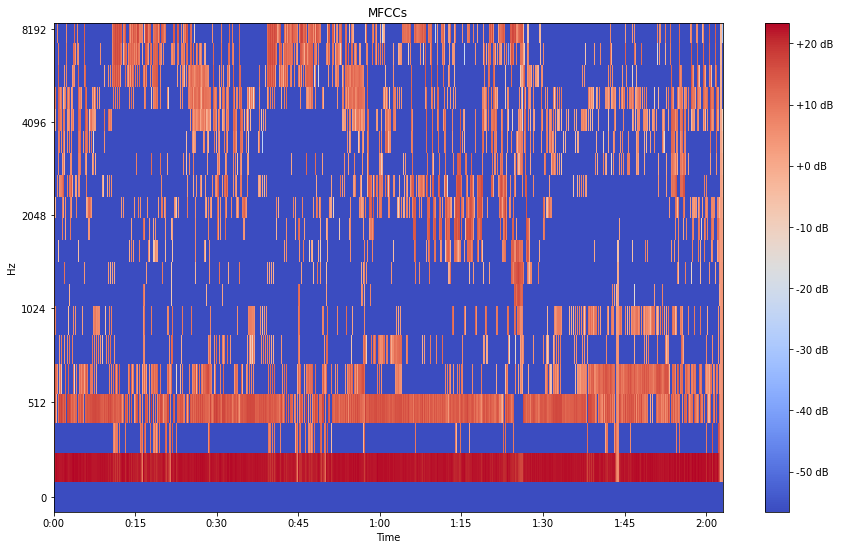

In [55]:
mfcc = lr.core.power_to_db(lr.feature.mfcc(audio, sr=sample_rate))
fig, ax = plt.subplots(figsize=(15,9))
img = lr.display.specshow(mfcc, x_axis='time',
                         y_axis='mel', sr=sample_rate,
                         fmax=8000, ax=ax)
fig.colorbar(img, ax=ax, format='%+2.0f dB')
ax.set(title='MFCCs')
plt.savefig('mfcc-librosa-db.png')

/var/folders/4j/qgq5s9cs2yb92gw34b25z1mh0000gn/T/ipykernel_65764/1962876540.py:1: FutureWarning: Pass sr=22050, n_fft=2048 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  chroma_filters = lr.filters.chroma(sample_rate, 2048)


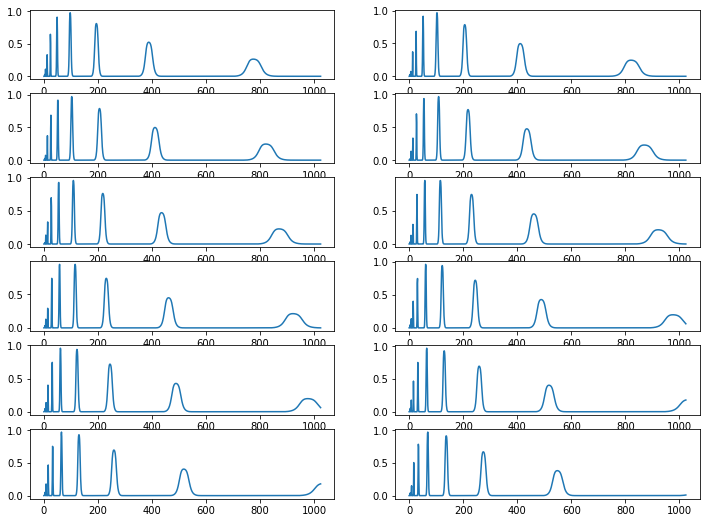

In [56]:
chroma_filters = lr.filters.chroma(sample_rate, 2048)
fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12,9))

for i, row in enumerate(ax):
    for j, col in enumerate(row):
        col.plot(chroma_filters[i + j])
        
plt.show()

/Users/chrishussein/.pyenv/versions/3.8.12/envs/deepOstinato/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  return f(*args, **kwargs)


[Text(0.5, 1.0, 'Chromagram')]

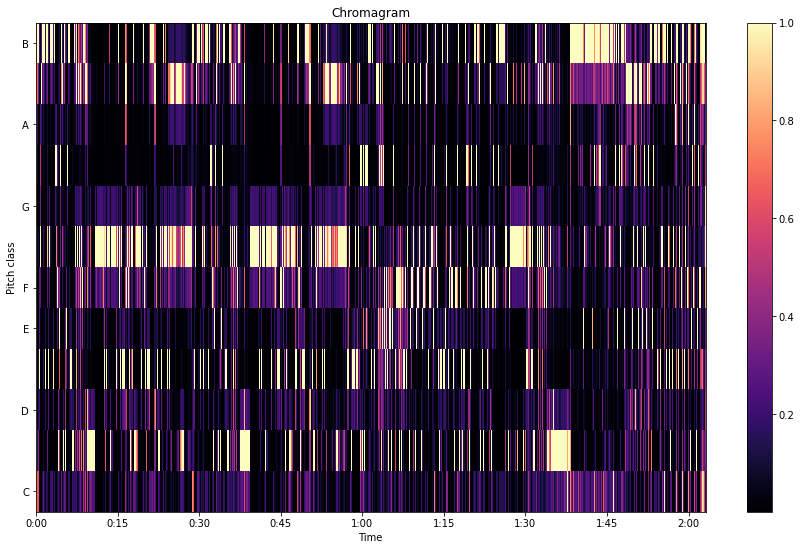

In [58]:
S = lr.stft(audio)**2
chroma = lr.feature.chroma_stft(S=S, sr=sample_rate)
fig, ax = plt.subplots(figsize=(15,9))
img = lr.display.specshow(chroma, y_axis='chroma', 
                               x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

/var/folders/4j/qgq5s9cs2yb92gw34b25z1mh0000gn/T/ipykernel_65764/1863562437.py:1: FutureWarning: Pass y=[-2.2254766e-05 -2.5567924e-05 -2.1185357e-05 ... -4.4733258e-03
 -3.2365641e-03 -1.3232187e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  o_env = lr.onset.onset_strength(audio, sr=sample_rate)


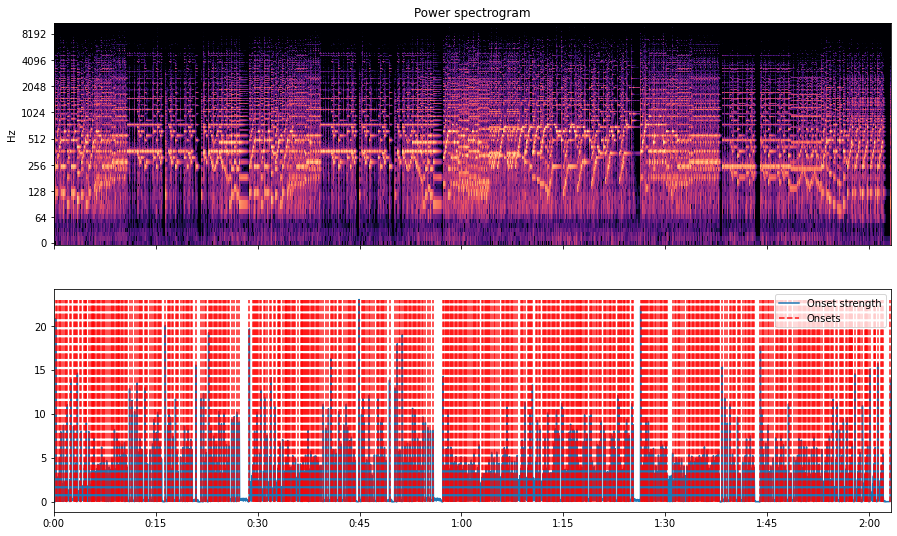

In [61]:
o_env = lr.onset.onset_strength(audio, sr=sample_rate)
times = lr.times_like(o_env, sr=sample_rate)
onset_frames = lr.onset.onset_detect(onset_envelope=o_env, sr=sample_rate)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,9))
lr.display.specshow(S_dB, x_axis='time', 
                         y_axis='log', ax=ax[0])

ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), 
             color='r', alpha=0.9,
             linestyle='--', label='Onsets')
ax[1].legend()

plt.savefig('onsets.png')

In [63]:
sampling_rate = sample_rate


/var/folders/4j/qgq5s9cs2yb92gw34b25z1mh0000gn/T/ipykernel_65764/87406939.py:2: FutureWarning: Pass y=[-2.2254766e-05 -2.5567924e-05 -2.1185357e-05 ... -4.4733258e-03
 -3.2365641e-03 -1.3232187e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  o_env = lr.onset.onset_strength(x, sr=sampling_rate)
/var/folders/4j/qgq5s9cs2yb92gw34b25z1mh0000gn/T/ipykernel_65764/87406939.py:3: FutureWarning: Pass y=[-2.2254766e-05 -2.5567924e-05 -2.1185357e-05 ... -4.4733258e-03
 -3.2365641e-03 -1.3232187e-03] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  total_time = lr.get_duration(x)


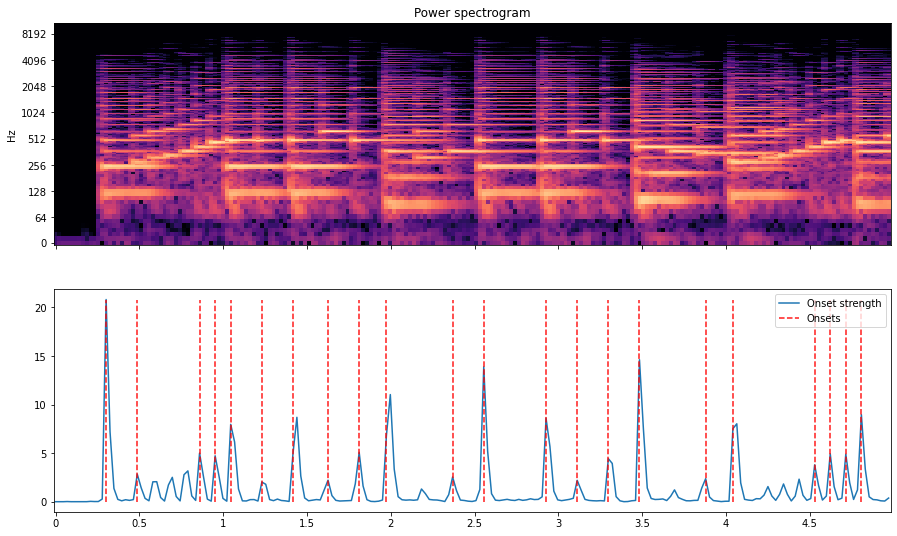

In [64]:
x = audio.copy()
o_env = lr.onset.onset_strength(x, sr=sampling_rate)
total_time = lr.get_duration(x)
five_sec_mark = int(o_env.shape[0]/total_time*5)
o_env = o_env[:five_sec_mark]
times = lr.times_like(o_env, sr=sampling_rate)
onset_frames = lr.onset.onset_detect(onset_envelope=o_env, sr=sampling_rate)

fig, ax = plt.subplots(nrows=2, sharex=True, figsize=(15,9))
lr.display.specshow(S_dB[:, :five_sec_mark], x_axis='time', 
                         y_axis='log', ax=ax[0])

ax[0].set(title='Power spectrogram')
ax[0].label_outer()
ax[1].plot(times, o_env, label='Onset strength')
ax[1].vlines(times[onset_frames], 0, o_env.max(), 
             color='r', alpha=0.9,
             linestyle='--', label='Onsets')
ax[1].legend()

plt.savefig('onsets-5secs.png')

In [65]:
S_dB

array([[-63.12967 , -56.986023, -55.685608, ..., -54.660923, -53.23249 ,
        -37.63036 ],
       [-64.87549 , -61.101967, -61.658714, ..., -52.75318 , -45.09486 ,
        -35.384827],
       [-70.344246, -75.994446, -80.      , ..., -55.926506, -52.365383,
        -35.03304 ],
       ...,
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ],
       [-80.      , -80.      , -80.      , ..., -80.      , -80.      ,
        -80.      ]], dtype=float32)